<a href="https://colab.research.google.com/github/EddyGiusepe/Understanding_Convolutional_Neural_Networks_CNN/blob/main/Understanding_the_Design_of_a_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <h2 align="center">Understanding the Design of a Convolutional Neural Network</h2>


Data Scientist.: Dr.Eddy Giusepe Chirinos Isidro

As Redes Neurais Convolucionais (`CNN`) foram encontradas com sucesso em aplicações de `Visão computacional`. Várias arquiteturas de rede são propostas e não são mágicas nem difíceis de entender.

Aqui entenderemos a operação das `camadas convolucionais` (Convolutional Layer) e seu papel em uma rede neural convolucional maior.

Ao terminar este script aprenderá:

* Como as camadas convolucionais extraem recursos da imagem

* Como diferentes camadas convolucionais podem se empilhar para construir uma rede neural.

Leitura adicional:

* [Convolutional Neural Networks (CNNs / ConvNets)](https://cs231n.github.io/convolutional-networks/)


* [CNN](https://machinelearningmastery.com/understanding-the-design-of-a-convolutional-neural-network/)


* [Deep Learning - CNN](https://machinelearningmastery.com/convolutional-layers-for-deep-learning-neural-networks/)


* [A Gentle Introduction to Padding and Stride for Convolutional Neural Networks](https://machinelearningmastery.com/padding-and-stride-for-convolutional-neural-networks/)

![](https://cdn.discuss.boardinfinity.com/original/2X/1/1f1bf9539699c880b33f978e724f803ef8197f6f.png)

# Exemplo de uma Rede Neural

Para este exemplo vamos utilizar os Dados [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html).

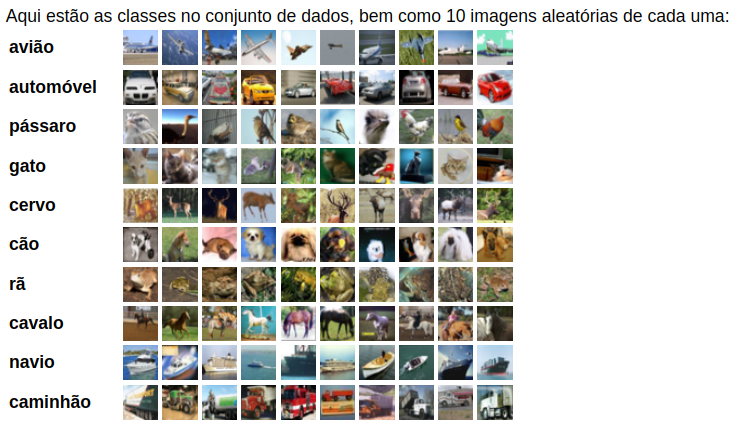

In [ ]:
# Importamos as nossas bibliotecas necessárias

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dropout, MaxPooling2D, Flatten, Dense
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.datasets.cifar10 import load_data

In [ ]:
# Carregamos nosso Dataset

(X_train, y_train), (X_test, y_test) = load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
# Re-escalamos nossas imagens

X_train_scaled = X_train / 255.0
X_test_scaled = X_test / 255.0

In [ ]:
X_train.shape, X_train_scaled.shape

((50000, 32, 32, 3), (50000, 32, 32, 3))

In [ ]:
y_train.shape, y_test.shape

((50000, 1), (10000, 1))

In [ ]:
# Criando o Modelo

model = Sequential([
    # Convolução  espacial sobre Imagens
    # Cria um Kernel de Convolução                
    Conv2D(32, (3,3), input_shape=(32, 32, 3), padding="same", activation="relu", kernel_constraint=MaxNorm(3)), # https://keras.io/api/layers/convolution_layers/convolution2d/
    Dropout(0.3),
    Conv2D(32, (3,3), padding="same", activation="relu", kernel_constraint=MaxNorm(3)),
    MaxPooling2D(), # Reduz a resolução da entrada ao longo de suas dimensões espaciais (altura e largura)
    Flatten(),
    Dense(512, activation="relu", kernel_constraint=MaxNorm(3)),
    Dropout(0.5),
    Dense(10, activation="sigmoid")
])

In [ ]:
# Instanciamos o Modelo e configuramos ele

model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy", 
              metrics="sparse_categorical_accuracy")

In [ ]:
# Agora Treinamos nosso Modelo com o método .fit()

model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=25, batch_size=32, verbose=1)

Epoch 1/25
1563/1563 [==============================] - 18s 5ms/step - loss: 1.5691 - sparse_categorical_accuracy: 0.4295 - val_loss: 1.2301 - val_sparse_categorical_accuracy: 0.5616
Epoch 2/25
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2117 - sparse_categorical_accuracy: 0.5688 - val_loss: 1.0698 - val_sparse_categorical_accuracy: 0.6245
Epoch 3/25
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0869 - sparse_categorical_accuracy: 0.6132 - val_loss: 0.9930 - val_sparse_categorical_accuracy: 0.6484
Epoch 4/25
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0285 - sparse_categorical_accuracy: 0.6347 - val_loss: 0.9599 - val_sparse_categorical_accuracy: 0.6652
Epoch 5/25
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9866 - sparse_categorical_accuracy: 0.6521 - val_loss: 0.9327 - val_sparse_categorical_accuracy: 0.6706
Epoch 6/25
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9510 - spar

Esta rede é capaz de atingir cerca de $70\%$ de precisão na classificação. As Imagens estão em $32$x$32$ pixeis na cor `RGB`. Eles estão em $10$ classes diferentes, cujos rótulos são inteiros de $0$ a $9$. 

A seguir printamos a REDE usando o método `.summary()`:

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 512)               4194816   
                                                        

Como observamos, na rede acima usamos duas camadas convolucionais (`Conv2D`). A primeira camada é definida da seguinte forma:


```
Conv2D(32, (3,3), input_shape=(32, 32, 3), padding="same", activation="relu", kernel_constraint=MaxNorm(3))
```

O que significa que a camada terá um kernel de $3$x$3$ e será aplicada em uma imagem de entrada de $32$x$32$ pixeis e $3$ canais (as cores RGB). A saída desta camada será de $32$ canais.

Para entender a camada convolucional, podemos verificar seu kernel. A variável `model` contém a rede e podemos encontrar o kernel da primeira camada convolucional, assim:


In [ ]:
print(model.layers[0].kernel)

<tf.Variable 'conv2d/kernel:0' shape=(3, 3, 3, 32) dtype=float32, numpy=
array([[[[-3.23233455e-02, -5.47459759e-02, -1.79439574e-01,
           5.13978265e-02, -3.40082556e-01, -5.15652783e-02,
          -9.03563723e-02, -3.70622635e-01,  1.47490725e-01,
           7.29119480e-02, -1.22786872e-01,  2.61377931e-01,
          -2.98164397e-01,  4.07167733e-01,  2.66390324e-01,
          -8.95700008e-02,  1.27044484e-01,  5.35226688e-02,
          -4.49240506e-01,  3.92966084e-02,  1.81328759e-01,
          -5.90966782e-03,  6.08607642e-02,  1.63251385e-01,
           3.01192194e-01, -1.03645306e-02, -1.14835739e-01,
          -1.93912432e-01, -3.48526597e-01,  7.26696998e-02,
           9.23269466e-02,  2.40757525e-01],
         [ 6.18810579e-02, -7.10093156e-02, -2.47880355e-01,
          -2.73186654e-01, -2.99329787e-01, -1.28417686e-01,
           1.61278322e-02, -4.08212602e-01,  2.22367823e-01,
           6.73203319e-02, -1.28475383e-01,  1.48759812e-01,
           7.90338367e-02,  

Podemos dizer que `model.layers[0]` é a camada correta comparando o nome `conv2d` da saída acima com a saída de `model.summary()`. Essa camada possui um `kernel` de shape `(3, 3, 3, 32)`, que são respectivamente a altura, largura, canais de entrada e mapas de recursos de saída.

Suponha que o kernel seja um array NumPy k. Uma camada convolucional pegará seu kernel $k[:, :, 0, n]$ (um array $3$×$3$) e aplicará no primeiro canal da imagem. Em seguida, aplicará $k[:, :, 1, n]$ no segundo canal da imagem e assim por diante. Em seguida, o resultado da convolução em todos os canais é somado para se tornar o mapa de características $n$ de saída, que $n$ neste caso será executado de $0$ a $31$ para os $32$ mapas de características de saída.

No Keras, podemos extrair a saída de cada camada usando um modelo extrator. A seguir, criamos um lote com uma imagem de entrada e enviamos para a rede. Em seguida, analisamos os mapas de características (feature) da primeira camada convolucional:



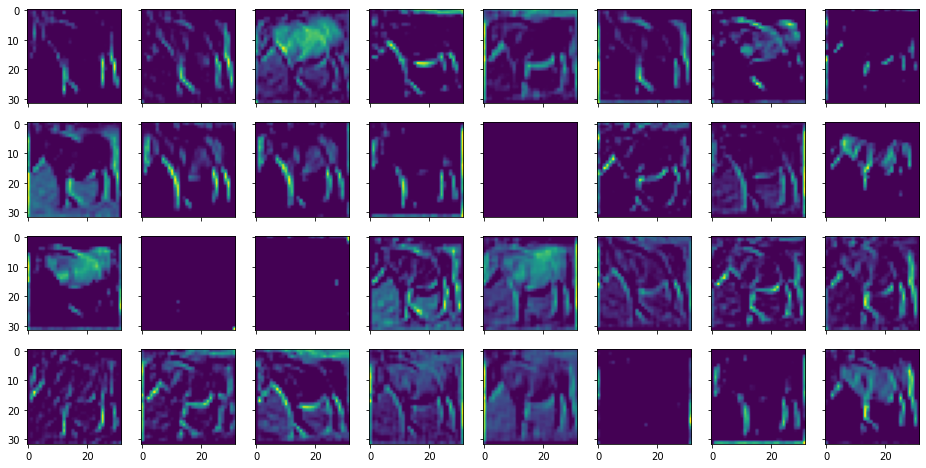

In [ ]:
# Extraia a saída de cada camada
extractor = tf.keras.Model(inputs=model.inputs,
                           outputs=[layer.output for layer in model.layers])

features = extractor(np.expand_dims(X_train[7], 0))
 
# Mostrar os 32 mapas de características (feautre) da primeira camada
l0_features = features[0].numpy()[0]
 
fig, ax = plt.subplots(4, 8, sharex=True, sharey=True, figsize=(16,8))
for i in range(0, 32):
    row, col = i//8, i%8
    ax[row][col].imshow(l0_features[..., i])
 
plt.show()

Isso corresponde à seguinte imagem de entrada:

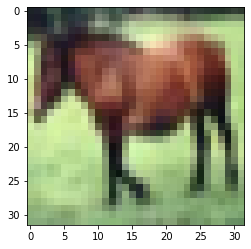

Podemos ver que os chamamos de mapas de características porque eles estão destacando determinadas características da imagem de entrada. Uma característica é identificado usando uma **pequena janela** (<font color="orange">neste caso, sobre um filtro de $3$×$3$ píxeis</font>). A imagem de entrada tem $3$ canais de cores. Cada canal tem um filtro diferente aplicado, cujos resultados são combinados para uma característica de saída.

Da mesma forma, podemos exibir o <font color="orange">mapa de características da saída da segunda camada convolucional</font>, da seguinte maneira:

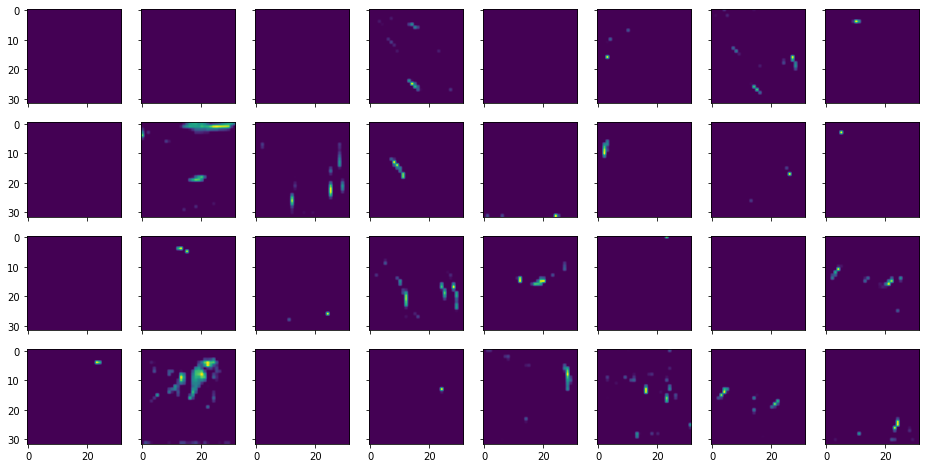

In [ ]:
# Mostramos os 32 mapas de características da terceira camada
l2_features = features[2].numpy()[0]
 
fig, ax = plt.subplots(4, 8, sharex=True, sharey=True, figsize=(16,8))
for i in range(0, 32):
    row, col = i//8, i%8
    ax[row][col].imshow(l2_features[..., i])
 
plt.show()

Pelo exposto, você pode ver que os recursos extraídos são mais abstratos e menos reconhecíveis.

# Efeito das Camadas Convolucionais

O `hiperparâmetro` mais importante para uma camada convolucional é o <font color="orange">tamanho do filtro</font>. Normalmente é em formato quadrado e podemos considerá-lo como uma janela ou campo receptivo para olhar a imagem de entrada. Portanto, quanto maior a resolução da imagem, esperaríamos um filtro maior.

Por outro lado, <font color="orange">um filtro muito grande borrará as características detalhadas</font> porque todos os píxeis do campo receptivo através do filtro serão combinados em um pixel no mapa de características de saída. Portanto, há uma compensação para o tamanho apropriado do filtro.

O empilhamento de duas camadas convolucionais (sem nenhuma outra camada intermediária) <font color="orange">é equivalente a uma única camada convolucional com filtro maior</font>. Mas este é um projeto típico hoje em dia para usar duas camadas com filtros pequenos empilhados juntos em vez de uma maior com filtro maior, <font color="orange">pois há menos parâmetros para treinar.</font>

A exceção seria a camada convolucional com filtro $1$×$1$. Geralmente é encontrado como a camada inicial de uma rede. O objetivo dessa camada convolucional é combinar os canais de entrada em um, em vez de transformar os píxeis. <font color="orange">Conceitualmente, isso pode converter uma imagem colorida em tons de cinza</font>, mas geralmente fazemos várias formas de conversão para criar mais canais de entrada do que apenas `RGB` para a rede.

Observe também que na rede acima, estamos usando `Conv2D`, para um filtro 2D. Há também uma camada `Conv3D` para um filtro 3D. A diferença é se aplicamos o filtro separadamente para cada canal ou mapa de características, ou consideramos os mapas de características de entrada empilhados como uma matriz 3D e aplicamos um único filtro para transformá-los completamente. Normalmente, o primeiro é usado, pois é mais razoável considerar nenhuma ordem específica em que os mapas de recursos devem ser empilhados.